Name: Sandip Regmi

Labpartner(s)

In [154]:
#import statements go here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import math
import statsmodels.api as sm

# Class 13.1 (And 13.2? Let's see how long this takes...)

#### Announcements

- Reminder **no labs will be accepted after 4/18.** After this you all will be working on your final projects. Please review the syllabus on BB for grading policies. 
- For the next two weeks we will have virtual workdays from 2-4PM, and you will submit your programming and a weekly project planning and assessment form.
- If there is a topic you all are excited about for Wed, let me know


# Warmups 13.1

Standard error (SE), aslo called root mean squre error (RMSE), is a measure of how "off" the model is from the data, and is calculated as the squared sum of the difference between the model and the data, divided by the number of data points, then the squre root is taken:

###   SE = $ \sqrt{\frac {\Sigma ( y_{data}-y_{model} )^2}{N}} $

where $y_{data}$ is the data to be fit by a model, $y_{model}$ is the model prediction, N is the number of data points. $\Sigma$ denotes a sum over all the data points. See https://onlinestatbook.com/2/regression/accuracy.html for more info

**W.1** Revisit the linear fit for the Boston housing data set (Lab 10.2), where you did the linear model of housing price vs. number of rooms and also lower status of the population. Compare and contrast the correlation, p values, and standard error for these two linear models. How does the standard error inform your decition as to which variable is a better predictor of housing value? 


In [2]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# create a second dataframe that has MEDV in it so we can look at correlation`
df2 = df
df2['MEDV'] = target.MEDV

In [6]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

# note this is a matrix of correlation coefficients, you only need the top right one

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

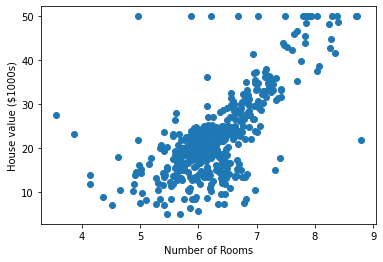

In [7]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

In [8]:
#How to find sample error of mean for given dataset...

In [9]:
RM1 = df["RM"]

In [10]:
MEDV1 = target["MEDV"]

In [11]:
# Function to find sample mean.
def mean(RM1, n) :
  
    # loop to calculate 
    # sum 
    sm = 0
    for i in range(0,n) :
        sm = sm + RM1[i]
       
    return sm / n

In [12]:
# Function to calculate sample
# standard deviation.
def SSD(RM1, n) :
    sm = 0
    for i in range(0,n) :
        sm = sm + (RM1[i] - mean(RM1, n)) * (RM1[i] - mean(RM1, n))
   
    return (math.sqrt(sm / (n - 1)))

In [13]:
# Function to calculate sample error.
def sampleError(RM1, n) :
  
    # Formula to find sample error.
    return SSD(RM1, n) / (math.sqrt(n))


In [14]:
n = len(RM1)

In [15]:
print(sampleError(RM1, n))

0.031235141929340838


In [16]:
# Function to find sample mean.
def mean(MEDV1, n) :
  
    # loop to calculate 
    # sum of array elements.
    sm = 0
    for i in range(0,n) :
        sm = sm + MEDV1[i]
       
    return sm / n

In [17]:
# Function to calculate sample
# standard deviation.
def SSD(RM1, n) :
    sm = 0
    for i in range(0,n) :
        sm = sm + (MEDV1[i] - mean(MEDV1, n)) * (MEDV1[i] - mean(MEDV1, n))
   
    return (math.sqrt(sm / (n - 1)))

In [18]:
# Function to calculate sample error.
def sampleError(MEDV1, n) :
  
    # Formula to find sample error.
    return SSD(MEDV1, n) / (math.sqrt(n))


In [19]:
n = len(MEDV1)

In [20]:
print(sampleError(MEDV1,n))

0.4088611474975351


In [21]:
from scipy import stats

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

In [23]:
slope

9.102108981180306

In [24]:
intercept

-34.67062077643854

In [25]:
r_value

0.6953599470715394

In [26]:
std_err #the std error of RM1 was 0.031 and MEDV was 0.408, if we add both it results in 0.4190.... great!!


0.4190265601213402

In [27]:
p_value


2.48722887100781e-74

Text(0, 0.5, 'House value ($1000s)')

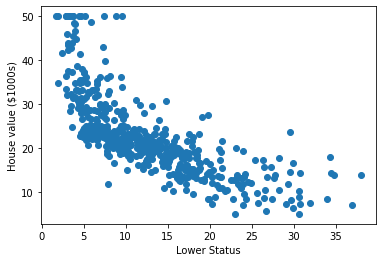

In [28]:
np.corrcoef(df["LSTAT"], target["MEDV"])
plt.scatter(df["LSTAT"], target["MEDV"])
plt.xlabel('Lower Status')
plt.ylabel('House value ($1000s)')

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LSTAT"],target["MEDV"])

In [30]:
slope

-0.950049353757991

In [31]:
intercept

34.55384087938311

In [32]:
r_value

-0.7376627261740151

In [33]:
p_value

5.081103394386929e-88

In [34]:
std_err

0.03873341621263941

In [35]:
#The standard error of lower status population is less as compared to number of rooms.. Hence LSTAT helps in predicting the housing value accurately than number of rooms.

In [36]:
#Checking
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LSTAT"],RM1)

In [151]:
 intercept

7.048794533092658

In [38]:
std_err

0.00345993669014282

In [39]:
#The standard error of LSTAT is lower and r-value is closer to -1 (negative trend, but nearer to -1). 

**W.2** Using the statsmodels package, add a second variable to your model, so that you are fitting the equation:

$ MEDV = a*RM + b*LSTAT +c$


In [152]:
X = df[['RM','LSTAT']]
y = target["MEDV"]

In [161]:
x = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [162]:
model.params

RM       4.906906
LSTAT   -0.655740
dtype: float64

In [166]:
pred = model.predict(X)
pred

0      28.997322
1      25.513780
2      32.613488
3      32.410653
4      31.574564
         ...    
501    26.010226
502    24.076146
503    30.532203
504    29.088325
505    24.421412
Length: 506, dtype: float64

In [165]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:29:00   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**W.3** Is this a more predictive model of housing value? Explain.



In [41]:
#the standard error is comparatively less in Lower status index and r-value is nearer to -1. the data is not much widespread from mean value.
#Hence LSTAT is better for prediction.

**W.4** What are the values of a and b? What do they mean in this context? 

In [42]:
#the value of a and b are the regression of rooms data and lower status population respectively. They represent the trend of data with housing value.

# Lecture 13.1

## Agenda:
- Machine Learning in Scikit learn

## Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines and in many business applications. The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". A useful flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression. This involves finding the best fit parameters for some model, like with did with linear models.

2) Clustering, which groups data by some similarity criterion (e.g., these data points are grass, these are trees, and these are water because of their spectral data differences). See https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

3) Dimensionality reduction, which breaks data, often timesries data, into principle components. For example if we were looking at a temperature timeseries, we might get as components an annual cycle, a daily cycle, and a multi-year cycle corresponding to ENSO (El Nino - Southern Oscillation), etc.

4) Classification. This uses labeled data to make preditions about what will happen in places you don't have data, for example in this area it is expected to see large green birds and not small red birds, and in another area it is expected to see both types. We will focus on this today.

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\sandi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sandi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sandi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


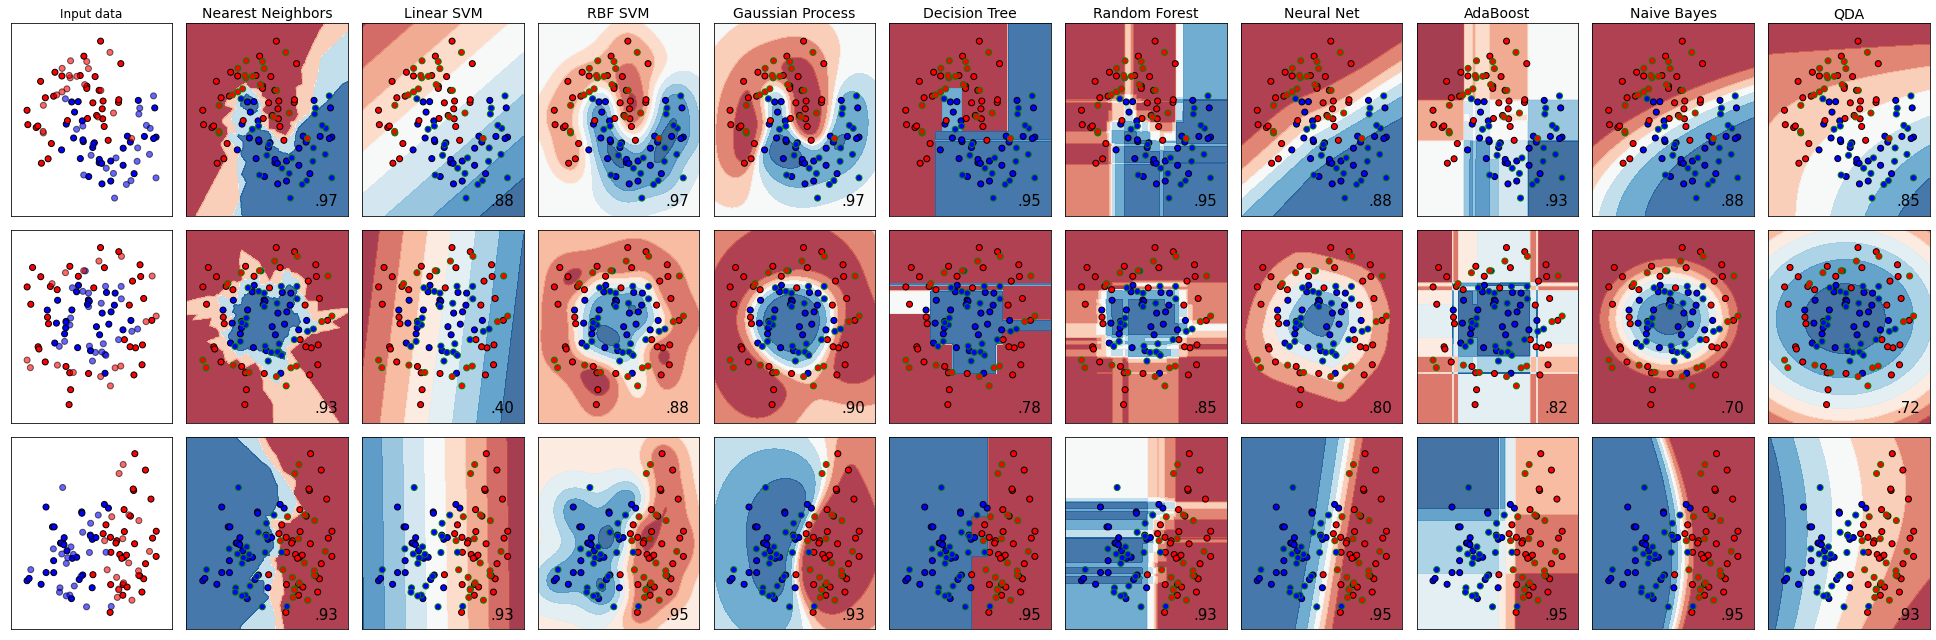

In [43]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

# Step by step

### Load all the packages in

Note they do this for each package separately


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data and pre-proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers we will use:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [45]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [46]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Part 1: Make some datasets to classify

The example uses three types of data, linearly separable, moons and circles

### Data 1. Linearly separable (side by side data)

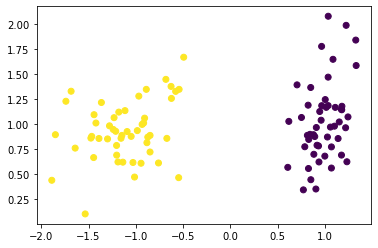

In [47]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [48]:
# add som noise to these so they smoosh together
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

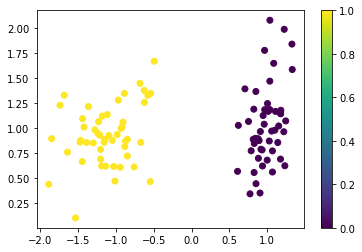

In [49]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

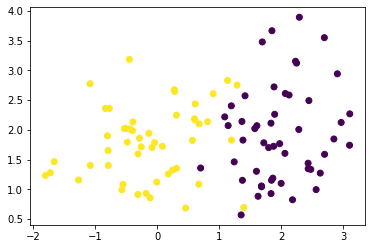

In [50]:
plt.scatter(X[:,0],X[:,1], c = y)

### E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

In [51]:
# add som noise to these so they smoosh together
X_old = X
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

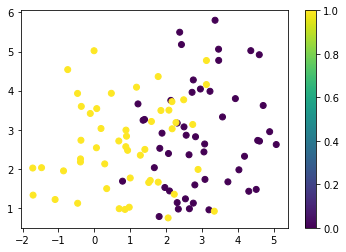

In [52]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

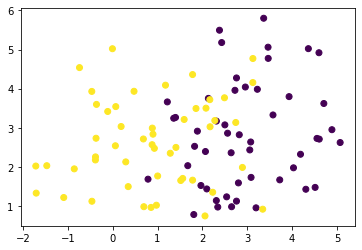

In [53]:
plt.scatter(X[:,0],X[:,1], c = y)

### Data 2. Moons

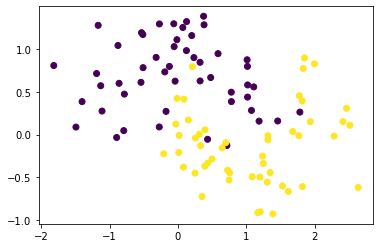

In [54]:
X,y = make_moons(noise=0.3, random_state=10)
plt.scatter(X[:,0],X[:,1], c = y)

### E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?

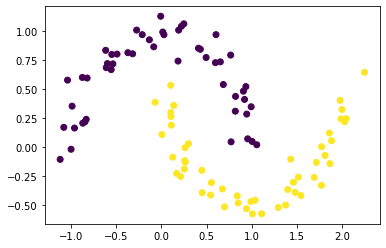

In [72]:
X,y = make_moons(noise=0.09, random_state=7) #0.09 and 7
plt.scatter(X[:,0],X[:,1], c = y)

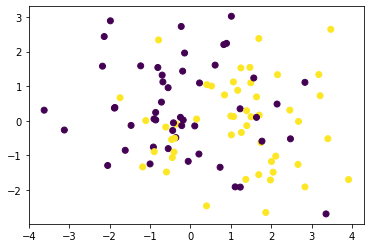

In [71]:
X,y = make_moons(noise=1.2, random_state=16) #0.12 and 16
plt.scatter(X[:,0],X[:,1], c = y)

In [73]:
# The increment and decrement of noise and random state shows
# unequal distribution of data
#The noise of 0.3 seems equal distribution of data with lesser crowd

### Data 3. Circles
### E3 Play around with the options for make_circles. What does factor do?

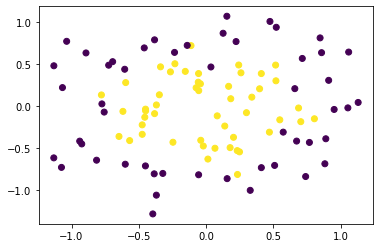

In [55]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

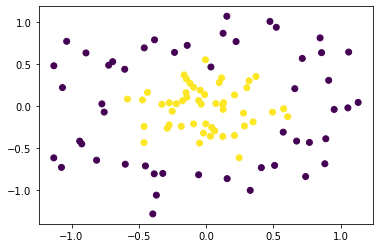

In [74]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.3, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

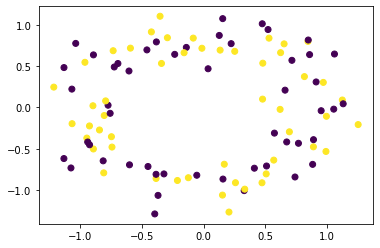

In [80]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.95, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

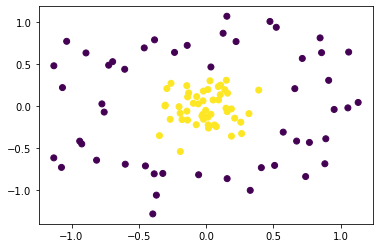

In [79]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor= 0.01, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [82]:
#The factor impact on the central alignment of distribution.

In [85]:
### the less factor value, the data are crowded on the centre part
#whereas the more factor value, the distribution is farther from centre..

In [56]:
# put the three types of datasets together in one array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [86]:
datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

## Part 2: Big double for loop

The next part of the code has a double for loop that:

    Loops over the datasets
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
    
        Loops over the classifiers
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
        
        
Let's break this down, and start with one dataset and apply a number of classifiers to it

### Using first dataset (moons) and first estimator

#### FIrst we preproccess
preprocess dataset, split into training and test part

scale the data

In [90]:
# get the first dataset, which is moons
X, y = datasets[0]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X1 = StandardScaler().fit_transform(X)


### E4 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

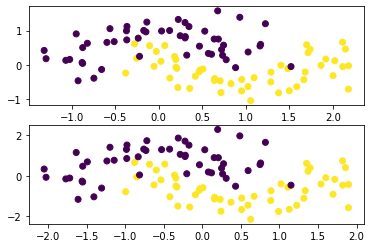

In [91]:
figure, axes = plt.subplots(2)
axes[0].scatter(X[:,0],X[:,1], c= y)
axes[1].scatter(X1[:,0],X1[:,1], c= y)

In [92]:
# There is change in the scale of map. The scale is increased by factor of 1 in below map.

In [93]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)


In [94]:
y_train # color

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [95]:
X_train #position

array([[ 0.77455385,  0.15375803],
       [ 0.06873258,  0.56648467],
       [ 0.95217454, -0.75307471],
       [ 1.69945309,  0.58771967],
       [ 2.18137168, -0.02291747],
       [ 1.16339832,  0.55290238],
       [-0.56175303,  1.05486051],
       [-0.74662946, -0.3829632 ],
       [ 0.20718083, -0.09767143],
       [ 1.22540835,  1.19793017],
       [-0.65805008, -0.12944211],
       [-0.0551441 , -0.03733246],
       [ 0.30430746,  0.82373935],
       [-0.25451559,  0.19317272],
       [-0.02922115,  0.39287336],
       [ 0.63856467, -0.44718443],
       [ 0.5696927 ,  0.33744136],
       [ 0.71435231, -0.79994161],
       [ 0.12412421,  1.00062892],
       [ 0.50764124, -0.11731979],
       [ 0.52824196,  0.98300993],
       [-1.29681764,  0.18414709],
       [ 0.32118546,  0.28668667],
       [-1.06964997,  0.13666025],
       [ 1.4045116 , -0.00705701],
       [ 1.586188  , -0.62984517],
       [ 0.67680544,  1.57189931],
       [ 0.74444551,  0.57661371],
       [-0.37227848,

### E5 What percentage of the data is used for training here?

(60, 2)

(60,)

In [101]:
# 60% of data is used for training.

### plot the data

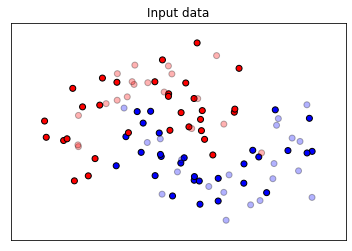

In [61]:
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


Note the testing data is the more transparent set, and the training data is darker

Now we are ready to apply classifiers

Remember we are doing the following:

classifiers = [

    KNeighborsClassifier(3),
    
    SVC(kernel="linear", C=0.025),
    
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    DecisionTreeClassifier(max_depth=5),
    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    MLPClassifier(alpha=1),
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

## Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.

intro https://www.python-course.eu/k_nearest_neighbor_classifier.php

see https://scikit-learn.org/stable/modules/neighbors.html

and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

actual help files:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [62]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [63]:
name

'Nearest Neighbors'

In [64]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(n_neighbors=3)

In [65]:
score

0.975

Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [66]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

### E6 what does the xx.ravel() bit of code do?

In [109]:
nep = np.ones((4, 3))
nep

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [110]:
nep.ravel()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [107]:
# It changes the dimension of array to single dimension

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

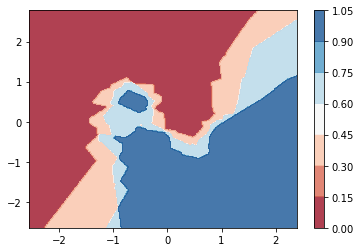

In [67]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

### E7 what do the light blue and peach colors represent?


In [111]:
# The light blue represents the prediction of probability closer to blue and peach color represent nearer to red.

Now we will add in the training and testing points, and see how well the method did to predict the latter

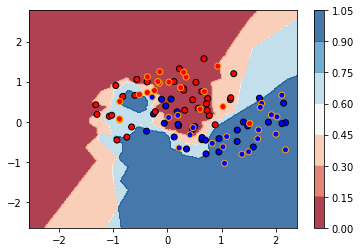

In [115]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

### E8 How well did the method do? Are there outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

In [116]:
# There is outlier for both of the color. The prediction is good but not the expected.
#i believe it predicted good, but not above better level ?????

### E9 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [117]:
names

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian Process',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA']

In [140]:
# index for classifier
#Neutral net and make_classification
c = 3
name = names[3]
clf = classifiers[3]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

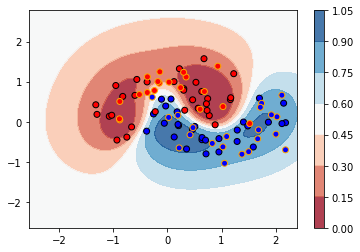

In [141]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)


# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')


# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

In [137]:
score

0.95

In [ ]:
#Looks it work same as the neighbour dataset. 


### E10 Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [147]:
# index for classifier
#Neutral net and make_classification
c = 4
name = names[4]
clf = classifiers[4]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

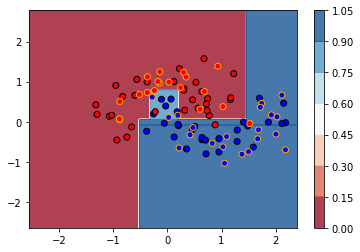

In [148]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)


# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')


# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

In [ ]:
# I feel like there is an error in dataset or the classification i am doing is worng..

## Notes on clustering vs. classification

Note that clustering is similar, but we don't have the y data, i.e. red/blue or any type of class assignemnt in the data itself, just locations in some variable space (could be lat/lon, or could be something way more abstract, like frequency vs. intensity space for sound data).

Here is a clustering example, similar to what we did above:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py